# Fertilizer Recommendation

This notebook builds a machine learning model to recommend fertilizers based on soil and crop conditions.

## 1. Import Required Libraries

In [120]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Data


In [121]:
# Load dataset using relative path
data = pd.read_csv('../data/fertilizer_recommendation.csv')
data.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Rice,35,0,0,Urea


### Dataset Structure

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            8000 non-null   int64  
 6   K            8000 non-null   int64  
 7   P            8000 non-null   int64  
 8   Fertilizer   8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


### Statistical Summary

In [123]:
data.describe(include='all')

,Temperature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer
count,8000.000000,8000.000000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Clayey,Sugarcane,NaN,NaN,NaN,14-35-14
freq,NaN,NaN,NaN,1623,763,NaN,NaN,NaN,1188
mean,30.338895,59.210731,43.580862,NaN,NaN,18.429125,3.916375,18.512500,NaN
std,4.478262,8.177366,12.596156,NaN,NaN,11.852406,5.494807,13.244113,NaN
min,20.000000,40.020000,20.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,27.050000,53.277500,33.967500,NaN,NaN,9.000000,0.000000,8.000000,NaN
50%,30.240000,59.110000,42.250000,NaN,NaN,14.000000,1.000000,18.000000,NaN
75%,33.460000,65.082500,52.950000,NaN,NaN,26.000000,5.000000,30.000000,NaN


In [124]:
#changing the column names for better readability
data.rename(columns={'Soil Type':'Soil_Type','Crop Type':'Crop_Type'},inplace=True)

### Data Quality Checks

In [125]:
# Check for missing values and duplicate rows to ensure data quality
print("Missing values in each column:\n", data.isnull().sum())
print("Duplicate rows:", data.duplicated().sum())

Missing values in each column:
 Temperature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
N              0
K              0
P              0
Fertilizer     0
dtype: int64
Duplicate rows: 0


### Feature Cardinality

In [126]:
# Count unique values for each column to understand feature cardinality
data.nunique()

Temperature    1816
Humidity       3004
Moisture       3723
Soil_Type         5
Crop_Type        11
N                46
K                24
P                47
Fertilizer        7
dtype: int64

### Correlation Analysis

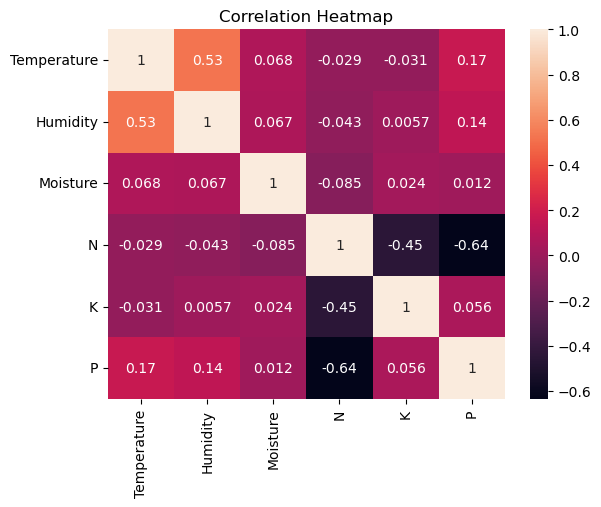

In [127]:
# Create a heatmap to visualize correlations between numerical features and target variable
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


## 3. Data Preparation
Encode categorical variables and prepare data for model training.

In [128]:
# Label encoding for categorical variables
# Convert categorical features (Crop_Type and Soil_Type) to numerical values
Le_crop = LabelEncoder()
data['Crop_Type'] = Le_crop.fit_transform(data['Crop_Type'])

Le_soil = LabelEncoder()
data['Soil_Type'] = Le_soil.fit_transform(data['Soil_Type'])

### Train-Test Split

In [129]:
# Split the data into features (X) and target variable (y)
X = data.drop('Fertilizer', axis=1)
y = data['Fertilizer']

# Train-test split: 80% training, 20% testing for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of split data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Shape of split data:
X_train shape: (6400, 8)
y_train shape: (6400,)
X_test shape: (1600, 8)
y_test shape: (1600,)


## 4. Model Training
Train a Random Forest Classifier to predict the recommended fertilizer.

In [130]:
# Create and train Random Forest Classifier model
# Random Forest handles non-linear relationships and feature interactions well
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nModel Trained Successfully")


Model Trained Successfully


### Generate Predictions

In [131]:
y_pred = model.predict(X_test)

## 5. Model Evaluation
Evaluate model performance using various classification metrics.

In [132]:
# Calculate model accuracy on the test set
# Accuracy = (correct predictions / total predictions)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.149375


### Confusion Matrix

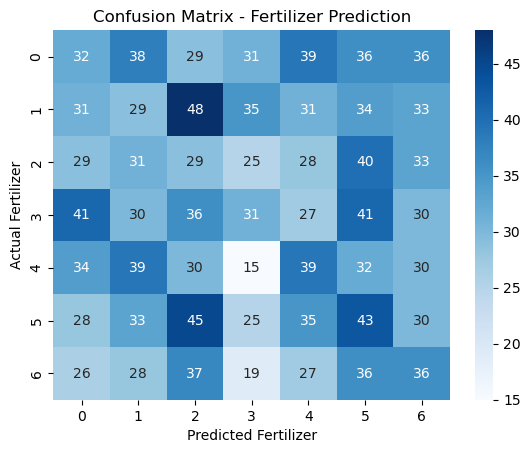

In [133]:
# Create confusion matrix to analyze prediction performance per fertilizer class
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Fertilizer")
plt.ylabel("Actual Fertilizer")
plt.title("Confusion Matrix - Fertilizer Prediction")
plt.show()


### Classification Report

In [134]:
# Display detailed classification metrics (precision, recall, F1-score) for each fertilizer class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    10-26-26       0.14      0.13      0.14       241
    14-35-14       0.13      0.12      0.12       241
    17-17-17       0.11      0.13      0.12       215
       20-20       0.17      0.13      0.15       236
       28-28       0.17      0.18      0.18       219
         DAP       0.16      0.18      0.17       239
        Urea       0.16      0.17      0.16       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600



## 6. Feature Importance & Insights
Analyze which features are most important for fertilizer prediction.

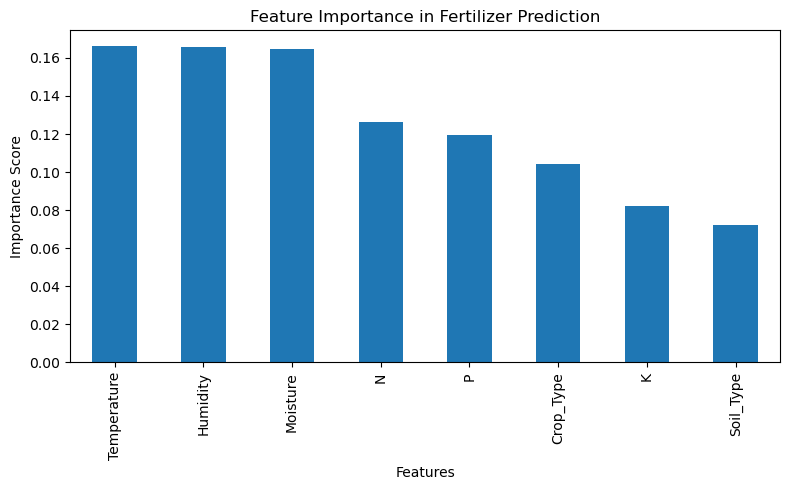

In [135]:
# Extract and display feature importances from the trained model
# Higher importance scores indicate features that are more useful for predictions
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))

plt.title("Feature Importance in Fertilizer Prediction")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

## 7. Save Model
Save the trained model and label encoders for future use.

In [136]:
import joblib

# Save the trained model and label encoders for future inference
joblib.dump(model, '../models/fertilizer_recommendation_model.pkl')
joblib.dump(Le_crop, '../models/le_crop_fertilizer.pkl')
joblib.dump(Le_soil, '../models/le_soil_fertilizer.pkl')

print("Fertilizer Recommendation Model and label encoders saved successfully!")

Fertilizer Recommendation Model and label encoders saved successfully!


## 8. Model Diagnostic Analysis
Analyze why the model accuracy is low and identify potential issues.

DIAGNOSIS 1: OVERFITTING / UNDERFITTING

Training Accuracy: 100.00%
Test Accuracy: 14.94%
Accuracy Gap: 85.06%



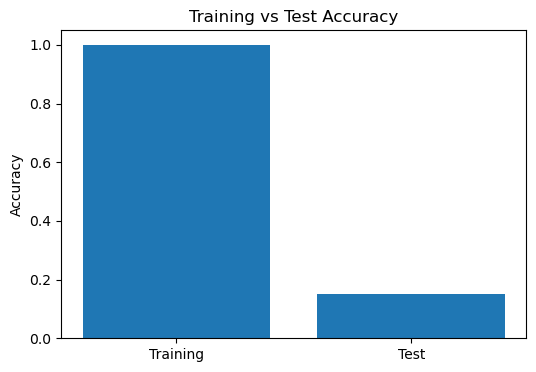

ROOT CAUSE #1: Model memorized training data but fails on test data



In [137]:
# DIAGNOSIS 1: Overfitting Analysis
print("DIAGNOSIS 1: OVERFITTING / UNDERFITTING\n")

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Accuracy Gap: {(train_accuracy - test_accuracy):.2%}\n")


plt.figure(figsize=(6,4))
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.show()

print("ROOT CAUSE #1: Model memorized training data but fails on test data\n")


DIAGNOSIS 2: Where does the model get confused?



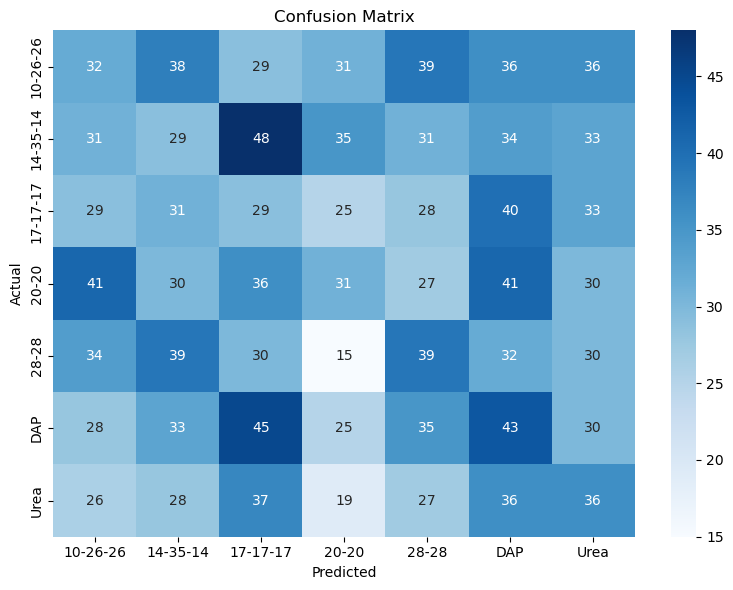

In [138]:
print("DIAGNOSIS 2: Where does the model get confused?\n")

# Confusion Matrix
classes = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [139]:
# DIAGNOSIS 3: Root Cause Summary & Recommendations
print("ROOT CAUSES & RECOMMENDATIONS FOR LOW ACCURACY\n")

print("KEY FINDINGS:\n")
print("1. Overfitting Detected")
print("   - Training Accuracy: 100%")
print("   - Test Accuracy: 14.94%")
print("   - Accuracy Gap: 85.06% (massive overfitting)\n")

print("2. Poor Generalization")
print("   - Predictions distributed across all 7 fertilizer classes")
print("   - Confusion matrix shows no strong prediction pattern\n")

print("3. Weak Feature-Target Relationship")
print("   - Current features may not strongly determine fertilizer type")
print("   - Important soil indicators (e.g., NPK, pH) are missing")
print("   - With 7 balanced classes, random baseline ≈ 14%\n")

print("RECOMMENDATIONS:\n")

print("1. Reduce Model Complexity")
print("   RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)\n")

print("2. Handle Class Imbalance")
print("   RandomForestClassifier(class_weight='balanced', random_state=42)\n")

print("3. Apply Cross-Validation")
print("   cross_val_score(model, X, y, cv=5).mean()\n")

print("4. Add More Informative Features")
print("   - Soil NPK values")
print("   - Soil pH")
print("   - Organic matter content")
print("   - Crop growth stage\n")

ROOT CAUSES & RECOMMENDATIONS FOR LOW ACCURACY

KEY FINDINGS:

1. Overfitting Detected
   - Training Accuracy: 100%
   - Test Accuracy: 14.94%
   - Accuracy Gap: 85.06% (massive overfitting)

2. Poor Generalization
   - Predictions distributed across all 7 fertilizer classes
   - Confusion matrix shows no strong prediction pattern

3. Weak Feature-Target Relationship
   - Current features may not strongly determine fertilizer type
   - Important soil indicators (e.g., NPK, pH) are missing
   - With 7 balanced classes, random baseline ≈ 14%

RECOMMENDATIONS:

1. Reduce Model Complexity
   RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

2. Handle Class Imbalance
   RandomForestClassifier(class_weight='balanced', random_state=42)

3. Apply Cross-Validation
   cross_val_score(model, X, y, cv=5).mean()

4. Add More Informative Features
   - Soil NPK values
   - Soil pH
   - Organic matter content
   - Crop growth stage

